In [22]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [23]:
import os
os.chdir('/content/gdrive/MyDrive/Dataset/Furniture')

In [110]:
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', 
                 padding='same', input_shape=(200, 300, 3)))

model.add(MaxPooling2D((2, 2)))

# Reshape the deep features to fit MLP as its input
model.add(Flatten())

# Full-connected layers 
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


#add a layer with 10 neurons


# Step for model compilation
opt = SGD(lr=0.0001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer = 'adam',
             # metrics = ['accuracy'])
# Summary of the model
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 200, 300, 32)      896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 100, 150, 32)      0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 480000)            0         
_________________________________________________________________
dense_76 (Dense)             (None, 128)               61440128  
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 129       
Total params: 61,441,153
Trainable params: 61,441,153
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [111]:
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_it = datagen.flow_from_directory('/content/gdrive/MyDrive/Dataset/Furniture/train',
    class_mode='binary', batch_size=10, target_size=(200, 300) , classes=[ 'Bed','sofa'] )
val_it = datagen.flow_from_directory('/content/gdrive/MyDrive/Dataset/Furniture/val',
    class_mode='binary', batch_size=10, target_size=(200, 300), classes=[ 'Bed', 'sofa'])

Found 240 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [112]:
print(train_it.class_indices)

{'Bed': 0, 'sofa': 1}


In [113]:
#training the model and log the history
history = model.fit(train_it, steps_per_epoch=len(train_it),
    validation_data=val_it, validation_steps=len(val_it), epochs=30, verbose=1)
# Validation of the model
loss, acc = model.evaluate(val_it, steps=len(val_it), verbose=1)
print('> %.2f' % (acc * 100.0))

Epoch 1/30
24/24 [==============================] - 60s 3s/step - loss: 0.6477 - accuracy: 0.6542 - val_loss: 0.5843 - val_accuracy: 0.6618
Epoch 2/30
24/24 [==============================] - 20s 831ms/step - loss: 0.5294 - accuracy: 0.7417 - val_loss: 0.5101 - val_accuracy: 0.7941
Epoch 3/30
24/24 [==============================] - 20s 811ms/step - loss: 0.4842 - accuracy: 0.7917 - val_loss: 0.5127 - val_accuracy: 0.8088
Epoch 4/30
24/24 [==============================] - 20s 821ms/step - loss: 0.4639 - accuracy: 0.7917 - val_loss: 0.5304 - val_accuracy: 0.7500
Epoch 5/30
24/24 [==============================] - 19s 810ms/step - loss: 0.4383 - accuracy: 0.8000 - val_loss: 0.4869 - val_accuracy: 0.7794
Epoch 6/30
24/24 [==============================] - 20s 813ms/step - loss: 0.4244 - accuracy: 0.8083 - val_loss: 0.4979 - val_accuracy: 0.7794
Epoch 7/30
24/24 [==============================] - 20s 816ms/step - loss: 0.4248 - accuracy: 0.8167 - val_loss: 0.5074 - val_accuracy: 0.7500
Ep

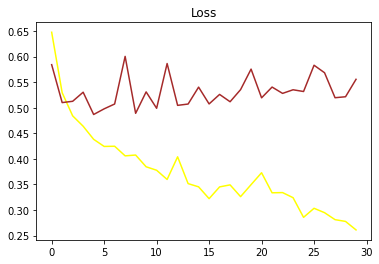

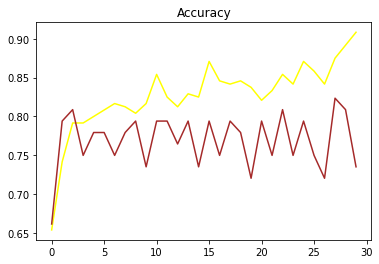

In [114]:
pyplot.title('Loss')
pyplot.plot(history.history['loss'], color='yellow', label='train')
pyplot.plot(history.history['val_loss'], color='brown', label='val')

pyplot.show()
# # Graph - the accuracy value
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], color='yellow', label='train')
pyplot.plot(history.history['val_accuracy'], color='brown', label='val')

# show the graphs
pyplot.show()